## Problem statement.

Build a recommender system by using cosine simillarties score.


## ANSWER:

In [1]:
#Import necesary  libarary
import pandas as pd
import numpy as np

In [2]:
#Let's read the file
df = pd.read_csv("book.csv",encoding='latin-1')

In [3]:
#Let's find first five elements in dataset
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [4]:
#Let's find the shape of data (Rows, columns)
df.shape

(10000, 4)

## EDA

Let's explore the data a bit and get a look at some of the best rated books.

## Visulization Imports

In [5]:
#Import an necessary libaray
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Let's create a ratings dataframe with average rating and number of ratings:

In [6]:
#Let's Drop the Unnamed: 0 column
df.drop(['Unnamed: 0'],axis='columns',inplace=True)

In [7]:
# Lets rename the column
book_df=df.rename(columns={'User.ID':'userId','Book.Title':'Title','Book.Rating':'Rating'}, inplace = False)

In [8]:
#Let's display five rows
book_df.head()

,userId,Title,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [9]:
#Let's apply groupby
book_df.groupby('Title')['Rating'].mean().sort_values(ascending=False).head()

Title
Clear Light of Day                                         10.0
Substitute Teaching: A Handbook for Hassle-Free Subbing    10.0
Daughter of Camelot (Merlin's Legacy, No 6)                10.0
The Resourceful English Teacher                            10.0
Das verbotene Lied.                                        10.0
Name: Rating, dtype: float64

In [10]:
book_df.groupby('Title')['Rating'].count().sort_values(ascending=False).head()

Title
Fahrenheit 451                                     5
Vanished                                           4
Charlie and the Chocolate Factory                  4
Stardust                                           4
The Amber Spyglass (His Dark Materials, Book 3)    4
Name: Rating, dtype: int64

In [11]:
ratings = pd.DataFrame(book_df.groupby('Title')['Rating'].mean())
ratings.head()

,Rating
Title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0


Now set the number of ratings column

In [12]:
ratings['num of ratings'] = pd.DataFrame(book_df.groupby('Title')['Rating'].count())
ratings.head()

,Rating,num of ratings
Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


Now a few histograms

<AxesSubplot:>

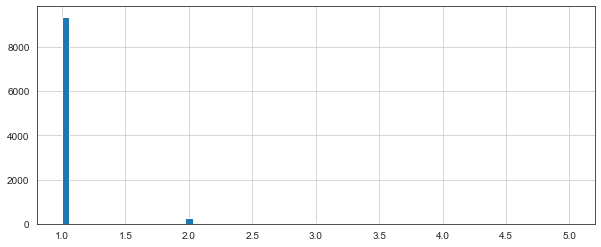

In [13]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

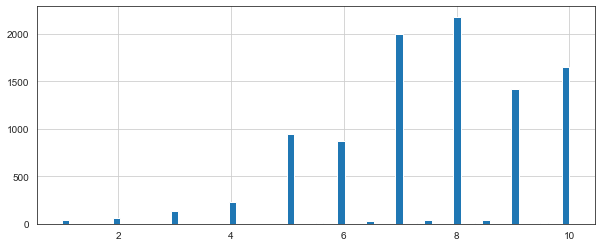

In [14]:
plt.figure(figsize=(10,4))
ratings['Rating'].hist(bins=70)

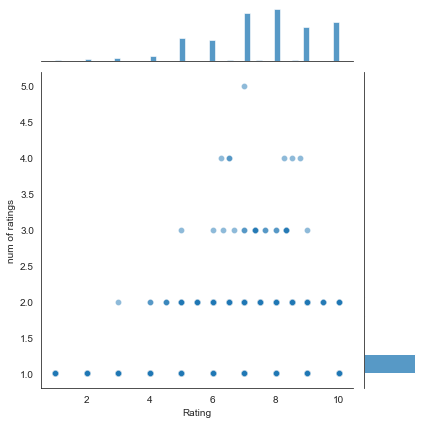

In [15]:
#Let's Draw join of hist and scatter plot
sns.jointplot(x='Rating',y='num of ratings',data=ratings,alpha=0.5)

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

## Recommending Similar Movies

Now let's create a matrix that has the user ids on one access and the book title on another axis. Each cell will then consist of the rating the user gave to that book. Note there will be a lot of NaN values, because most people have not read most of the book.



In [16]:
bookmat = book_df.pivot_table(index='userId',columns='Title',values='Rating')
bookmat.head()

Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userId,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated book:

In [17]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,Rating,num of ratings
Title,,
Fahrenheit 451,7.000000,5
Ender's Game (Ender Wiggins Saga (Paperback)),6.250000,4
Stardust,8.500000,4
Vanished,6.500000,4
Charlie and the Chocolate Factory,6.500000,4
"The Subtle Knife (His Dark Materials, Book 2)",8.750000,4
"The Amber Spyglass (His Dark Materials, Book 3)",8.250000,4
"The Golden Compass (His Dark Materials, Book 1)",8.333333,3
Pet Sematary,7.666667,3


Let's choose two books: Pet Sematary ,Stardust and The Subtle Knife (His Dark Materials, Book 2)

In [18]:
ratings.head()

,Rating,num of ratings
Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


Now let's grab the user ratings for those two books

In [19]:
TheSubtleKnife_user_ratings =bookmat['The Subtle Knife (His Dark Materials, Book 2)']
PetSematary_user_ratings =bookmat['Pet Sematary']
PetSematary_user_ratings.head()

userId
8    NaN
9    NaN
10   NaN
12   NaN
14   NaN
Name: Pet Sematary, dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

In [20]:
similar_to_TheSubtleKnife = bookmat.corrwith(TheSubtleKnife_user_ratings)
similar_to_PetSematary = bookmat.corrwith(PetSematary_user_ratings)

C:\Users\91830\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\91830\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [21]:
corr_TheSubtleKnife = pd.DataFrame(similar_to_TheSubtleKnife,columns=['Correlation'])
corr_TheSubtleKnife.dropna(inplace=True)
corr_TheSubtleKnife.head()

,Correlation
Title,
"The Amber Spyglass (His Dark Materials, Book 3)",0.987829
"The Golden Compass (His Dark Materials, Book 1)",1.000000
"The Subtle Knife (His Dark Materials, Book 2)",1.000000


Now if we sort the dataframe by correlation, we should get the most similar bookd, however note that we get some results that don't really make sense. This is because there are a lot of books only read once by users who also read The Subtle Knife (it was the most popular book).

In [22]:
corr_TheSubtleKnife.sort_values('Correlation', ascending=False).head(10)

,Correlation
Title,
"The Golden Compass (His Dark Materials, Book 1)",1.000000
"The Subtle Knife (His Dark Materials, Book 2)",1.000000
"The Amber Spyglass (His Dark Materials, Book 3)",0.987829


Let's fix this by filtering out book that have less than 3 reviews (this value was chosen based off the histogram from earlier).

In [23]:
corr_TheSubtleKnife = corr_TheSubtleKnife.join(ratings['num of ratings'])
corr_TheSubtleKnife.head()

,Correlation,num of ratings
Title,,
"The Amber Spyglass (His Dark Materials, Book 3)",0.987829,4
"The Golden Compass (His Dark Materials, Book 1)",1.000000,3
"The Subtle Knife (His Dark Materials, Book 2)",1.000000,4


Now sort the values and notice how the titles make a lot more sense:

In [24]:
corr_TheSubtleKnife[corr_TheSubtleKnife['num of ratings']>3].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
Title,,
"The Subtle Knife (His Dark Materials, Book 2)",1.000000,4
"The Amber Spyglass (His Dark Materials, Book 3)",0.987829,4


Now the same for Pet Sematary

In [25]:
corr_PetSematary= pd.DataFrame(similar_to_PetSematary,columns=['Correlation'])
corr_PetSematary.dropna(inplace=True)
corr_PetSematary= corr_PetSematary.join(ratings['num of ratings'])
corr_PetSematary[corr_PetSematary['num of ratings']>1].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
Title,,
Pet Sematary,1.0,3


In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, books.It just tells us what books/items are most similar to your book choice.

#  OR IT MAY BE SOLVE BY

In [26]:
book_df.head()

,userId,Title,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [27]:
#number of unique users in the dataset
len(book_df.userId.unique())

2182

In [29]:
book_df.drop_duplicates(subset ="userId",
                     keep = False, inplace = True)

In [30]:
user_book_df = book_df.pivot(index='userId',
                                 columns='Title',
                                values='Rating').reset_index(drop=True)

In [31]:
user_book_df 

Title,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,11th Hour,"20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2061: Odyssey Three,4 Blondes,"40 Tons Of Trouble (Women Who Dare) (Harlequin Super Romance, No 726)",500 palabras nuevas para ti / 500 Words To Grow On,8 Steps to a Healthy Heart: The Complete Guide to Heart Disease Prevention and Recovery from Heart Attack and Bypass Surgery,...,YESTERDAY'S NEWS : YESTERDAY'S NEWS,Year's Best Fantasy and Horror: Sixteenth Edition,You Are Not a Stranger Here : Stories,You're the One,Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zen in the Art of Archery (Vintage Spiritual Classics),Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
user_book_df.index = book_df.userId.unique()

In [33]:
user_book_df

Title,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,11th Hour,"20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2061: Odyssey Three,4 Blondes,"40 Tons Of Trouble (Women Who Dare) (Harlequin Super Romance, No 726)",500 palabras nuevas para ti / 500 Words To Grow On,8 Steps to a Healthy Heart: The Complete Guide to Heart Disease Prevention and Recovery from Heart Attack and Bypass Surgery,...,YESTERDAY'S NEWS : YESTERDAY'S NEWS,Year's Best Fantasy and Horror: Sixteenth Edition,You Are Not a Stranger Here : Stories,You're the One,Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zen in the Art of Archery (Vintage Spiritual Classics),Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
276726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#Imput those NaNs with 0 values
user_book_df.fillna(0, inplace=True)

In [36]:
user_book_df

Title,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,11th Hour,"20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2061: Odyssey Three,4 Blondes,"40 Tons Of Trouble (Women Who Dare) (Harlequin Super Romance, No 726)",500 palabras nuevas para ti / 500 Words To Grow On,8 Steps to a Healthy Heart: The Complete Guide to Heart Disease Prevention and Recovery from Heart Attack and Bypass Surgery,...,YESTERDAY'S NEWS : YESTERDAY'S NEWS,Year's Best Fantasy and Horror: Sixteenth Edition,You Are Not a Stranger Here : Stories,You're the One,Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zen in the Art of Archery (Vintage Spiritual Classics),Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [38]:
user_sim = 1 - pairwise_distances( user_book_df.values,metric='cosine')

In [39]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [40]:
#Store the result in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [41]:
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
#Set the index and column names to user ids 
user_sim_df.index = book_df.userId.unique()
user_sim_df.columns = book_df.userId.unique()

In [43]:
user_sim_df.iloc[0:10, 0:10]

,276726,276736,276737,276744,276745,276748,276751,276754,276755,276760
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
276760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:10, 0:10]

,276726,276736,276737,276744,276745,276748,276751,276754,276755,276760
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:10]

276726    276726
276736    276726
276737    276726
276744    276726
276745    276726
276748    276726
276751    276726
276754    276726
276755    276726
276760    276726
dtype: int64

In [97]:
book_df[(book_df['userId']==2) | (book_df['userId']==276760)]

,userId,Title,Rating
16,276760,More Cunning Than Man: A Social History of Rat...,10


In [98]:
user_1=book_df[book_df['userId']==276726]

In [99]:
user_1

,userId,Title,Rating
0,276726,Classical Mythology,5


In [108]:
user_2=book_df[book_df['userId']==523]

In [109]:
user_2

,userId,Title,Rating
2967,523,"Godel, Escher, Bach: An Eternal Golden Braid",8
